In [135]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#pd.set_option('use_inf_as_na', True)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#from matplotlib.colors import ListedColormap
#from sklearn import datasets, metrics, tree 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from subprocess import call
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix

import xgboost as xgb

import seaborn as sns

from termcolor import colored


import concurrent.futures

#from sklearn.ensemble import VotingClassifier
#from catboost import CatBoostClassifier
#import xgboost

from matplotlib.colors import ListedColormap
%pylab inline

pd.options.mode.chained_assignment = None  # default='warn'

#from IPython.display import Image
#from subprocess import call

Populating the interactive namespace from numpy and matplotlib


In [136]:
data = pd.read_csv('/media/acer/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
#data = pd.read_csv('E:/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
data_f = pd.read_csv('/media/acer/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
#data_f = pd.read_csv('E:/Host/Data/Bees/DataInit/data_mer.csv', decimal=',', sep = '\t', encoding='latin-1', parse_dates = ['Date_test'], dayfirst=True)
data_f.columns = data_f.columns.str.replace("/", "del")
data_f.columns = data_f.columns.str.replace(',','_')
data_f.columns = data_f.columns.str.replace(')','')
data_f.columns = data_f.columns.str.replace('(','')

data.columns   = data.columns.str.replace("/", "del")
data.columns = data.columns.str.replace(',','_')
data.columns = data.columns.str.replace(')','')
data.columns = data.columns.str.replace('(','')


In [137]:
def dbl_n(na):
    matr = pd.DataFrame(data_f[  
           (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
         #second feature   
         & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
         & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

    matr_dbl = pd.pivot_table(matr,
             index=['Date_test'],
                 values = ['res_profit', 'Year'],
                 aggfunc=['mean', 'count']                        
            
            )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
             index=['Year'],
                 values = ['Profit'],
                 aggfunc=['mean', 'count'],
                                   margins=True)
            
    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         

#STOCK
def dbl_s(na):
    matr_dbl_all = pd.DataFrame()    
    for na in na:
        matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

        matr_dbl = pd.pivot_table(matr,
                 index=['Symbol'],
                     values = 'res_profit',
                     aggfunc=['mean', 'count'],
                                  margins=True


                )
        matr_dbl.columns = ['Profit%', 'count']
        matr_dbl = matr_dbl.sort_values(by = 'count', ascending=False)
        
        matr_dbl_all = pd.concat([matr_dbl_all, matr_dbl], axis=1)
        #
        return(matr_dbl_all)
    


def year(na):

    matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])


    matr_dbl = pd.pivot_table(matr,
                 index=['Year'],
                     values = ['res_profit'],
                     aggfunc=['mean', 'count'],
                              margins=True

                )
    matr_dbl
    return(matr_dbl) 

def merg():    


    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all)  

def dbldddd_n(na):

    matr = pd.DataFrame(data_f[  
               (data_f[aa.index[aa['namber']==na][0][1]] >= aa[aa['namber']==na]['f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][1]] <= aa[aa['namber']==na]['f_max'][0])
             #second feature   
             & (data_f[aa.index[aa['namber']==na][0][2]] >= aa[aa['namber']==na]['1f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][2]] <= aa[aa['namber']==na]['1f_max'][0])
                     #3 feature   
             & (data_f[aa.index[aa['namber']==na][0][3]] >= aa[aa['namber']==na]['2f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][3]] <= aa[aa['namber']==na]['2f_max'][0])
    ])

    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)

    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         


# АНАЛИЗ ФИЧЕЙ СВЕРКА ЧЕРЕЗ DATA_F + дубликаты
def table():
    matr_all   = pd.DataFrame()
    matr_all1  = pd.DataFrame()
    matr_all2  = pd.DataFrame()
    matr_all3  = pd.DataFrame()
    matr_all_d = pd.DataFrame()
    matr_glo   = pd.DataFrame()

    data_f_analiz_year_pivot = pd.pivot_table(data_f_analiz_year[data_f_analiz_year['proba2_range'] >= 0.055], 
        index = ['feature_f', 'feature1', 'feature2', 'feature3', 'deep__', 'n_est',  'proba2_range'], 
        values=['namber', 'namber1', 'namber2', 'profit', 'fe_imp1','fe_imp2', 'fe_imp3'], 
        aggfunc = {'profit': ['mean', 'count'], 'namber':['mean', 'max', 'min'], 'namber1':['mean', 'max', 'min'], 'namber2':['mean', 'max', 'min'], 'fe_imp1':['mean'], 'fe_imp2':['mean'], 'fe_imp3':['mean']})
    data_f_analiz_year_pivot.columns = ['fe_imp1', 'fe_imp2', 'fe_imp2', 'f_max', 'f_mean', 'f_min', '1f_max', '1f_mean', '1f_min', '2f_max', '2f_mean', '2f_min', 'profit_c', 'profit_%']
    #data_f_analiz_year_pivot

    data_f_analiz_year_pivot = data_f_analiz_year_pivot[data_f_analiz_year_pivot['profit_c'] != 1] #УБИРАЕМ 1 СДЕЛКУ

    for na in np.arange(len(data_f_analiz_year_pivot.index)):
        matr = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])
             #second feature   
             & (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])
            #3 feature   
             & (data_f[data_f_analiz_year_pivot.index[na][3]] >= data_f_analiz_year_pivot['2f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][3]] <= data_f_analiz_year_pivot['2f_max'][na])
            ])
        matr1 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][1]] >= data_f_analiz_year_pivot['f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][1]] <= data_f_analiz_year_pivot['f_max'][na])])

        matr2 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][2]] >= data_f_analiz_year_pivot['1f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][2]] <= data_f_analiz_year_pivot['1f_max'][na])])

        matr3 = pd.DataFrame(data_f[  
               (data_f[data_f_analiz_year_pivot.index[na][3]] >= data_f_analiz_year_pivot['2f_min'][na])
             & (data_f[data_f_analiz_year_pivot.index[na][3]] <= data_f_analiz_year_pivot['2f_max'][na])])

        matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = 'res_profit',
                     aggfunc=['mean', 'count']                        

                )
        matr_dbl.columns = ['Profit%', 'count'] 
        matr_dbl_result  = matr_dbl['Profit%'].agg(['mean', 'count']).T #без дубликатов и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ

        matr   = matr['res_profit'].agg(['mean', 'count']).T # дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr1 = matr1['res_profit'].agg(['mean', 'count']).T # 1 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr2 = matr2['res_profit'].agg(['mean', 'count']).T # 2 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ
        matr3 = matr3['res_profit'].agg(['mean', 'count']).T # 3 фича дубликаты и ТУТ МОЖНО ДРУГИЕ ПРОФИТЫ ВОТКНУТЬ

        matr_all   = matr_all.append(matr)
        matr_all_d = matr_all_d.append(matr_dbl_result)
        matr_all1  = matr_all1.append(matr1)
        matr_all2  = matr_all2.append(matr2)
        matr_all3  = matr_all3.append(matr3)

    matr_all.index    = data_f_analiz_year_pivot.index
    matr_all1.index   = data_f_analiz_year_pivot.index
    matr_all2.index   = data_f_analiz_year_pivot.index
    matr_all3.index   = data_f_analiz_year_pivot.index
    matr_all_d.index  = data_f_analiz_year_pivot.index

    dddd = pd.concat([data_f_analiz_year_pivot, matr_all, ],  axis = 1)
    dddd = pd.concat([dddd, matr_all_d],                      axis = 1)
    dddd = pd.concat([dddd, matr_all1, ], axis = 1)
    dddd = pd.concat([dddd, matr_all2, ], axis = 1)
    dddd = pd.concat([dddd, matr_all3, ], axis = 1) 

    dddd.columns = ['fe_imp1','fe_imp2','fe_imp3','f_max','f_mean','f_min','1f_max','1f_mean','1f_min','2f_max','2f_mean','2f_min','profit_c','profit_%','c_alF','%_alF','co_-d','me_-d', 'c_1F','%_1F', 'c_2F','%_2F', 'c_3F','%_3F']

 #   dddd['namber'] = np.arange(len(dddd))
    return(dddd)


def dbldddd_n_Min10(na):

    matr = pd.DataFrame(data_f[  
               (data_f[aa.index[aa['namber']==na][0][1]] >= aa[aa['namber']==na]['f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][1]] <= aa[aa['namber']==na]['f_max'][0])
             #second feature   
             & (data_f[aa.index[aa['namber']==na][0][2]] >= aa[aa['namber']==na]['1f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][2]] <= aa[aa['namber']==na]['1f_max'][0])
                     #3 feature   
             & (data_f[aa.index[aa['namber']==na][0][3]] >= aa[aa['namber']==na]['2f_min'][0])
             & (data_f[aa.index[aa['namber']==na][0][3]] <= aa[aa['namber']==na]['2f_max'][0])
        
             & (data_f['Min10'] <= 3)  #minus min10
    ])

    matr_dbl = pd.pivot_table(matr,
                 index=['Date_test'],
                     values = ['res_profit', 'Year'],
                     aggfunc=['mean', 'count']                        

                )
    matr_dbl.columns = ['Year', 'Profit', 'dsfd', 'sdf']
    matr_dbl_year = pd.pivot_table(matr_dbl,
                 index=['Year'],
                     values = ['Profit'],
                     aggfunc=['mean', 'count'],
                                       margins=True)

    matr_dbl_year.columns = ['Profit%', 'count']        
    return(matr_dbl_year)         


def merg_Min10():    


    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
            & (data_f['Min10'] <= 3)  #minus min10
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all)  

def merg_blu():    

    #blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
    matr_all = pd.DataFrame()
    piv_matr_all_all = pd.DataFrame()
    for merg in np.arange(len(bb)):

        matr = pd.DataFrame(data_f[  
               (data_f[bb.index[merg][1]] >= bb['f_min'][merg])
             & (data_f[bb.index[merg][1]] <= bb['f_max'][merg])
             #second feature   
             & (data_f[bb.index[merg][2]] >= bb['1f_min'][merg])
             & (data_f[bb.index[merg][2]] <= bb['1f_max'][merg])
                         #3 feature   
             & (data_f[bb.index[merg][3]] >= bb['2f_min'][merg])
             & (data_f[bb.index[merg][3]] <= bb['2f_max'][merg])
            
             & (data_f['Symbol'].isin(blu))  #blu
            
        ])

        matr = matr.assign(namber = bb['namber'][merg])
        matr_all = matr_all.append(matr)

        piv_matr_1 = pd.pivot_table(matr[matr['namber']==bb['namber'][merg]], 
                                       index='Date_test',
                                        values=['res_profit', 'Year'],
                                          aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                                       )

        piv_matr_1.columns = ['Year', 'count', 'profit']
        piv_matr_1 = pd.pivot_table(piv_matr_1, 
                                       index='Year',
                                        values=['profit'],
                                          aggfunc=['mean', "count"],
                                          margins=True
                                       )
        piv_matr_1.columns = ['profit'+str(bb['namber'][merg]), 'count'+str(bb['namber'][merg])]
        piv_matr_all_all = pd.concat([piv_matr_all_all, piv_matr_1], axis=1)
        
    piv_matr_all = pd.pivot_table(matr_all, 
                               index='Date_test',
                                values=['res_profit', 'Year'],
                                  aggfunc={'res_profit':['mean', "count"], 'Year':['mean']}

                               )
    piv_matr_all.columns = ['Year', 'count', 'profit']
    piv_matr_all = pd.pivot_table(piv_matr_all, 
                               index='Year',
                                values=['profit'],
                                  aggfunc=['mean', "count"],
                                  margins=True

                               )

    piv_matr_all.columns = ['profit', 'count']    
    piv_matr_all_all = pd.concat([piv_matr_all, piv_matr_all_all], axis=1)



    return(piv_matr_all_all) 

In [138]:
data_f = data_f[[
    'Date_test',
'Profit %_1030',
 
 'Year',
 
 'GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20',
 ]]

In [3]:
%%time
data_f_analiz_year = pd.read_csv('data_f_analiz_year.txt', 
  usecols=["profit", 'feature_f', 'namber','n_est','deep__', 'Data', 'data_year', 'proba2_range', ], 
  dtype={"profit":'float16', 'namber':'float16','proba2_range':'float16','n_est':'int8','deep__':'int8','data_year':'int16'},
#  nrows=5000000
                                    )
#data_f_analiz_year

Wall time: 1min 28s


In [31]:
list(data_f)

['Date_test',
 'Profit %_1030',
 'Year',
 'GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [139]:
all__3 = ['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [140]:
all__2 = ['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [ ]:
        #рисуем     
                feature_f = str(item_fi) + '-' + str(item_se)
                for item_gr in list(range(n_est)):
                    export_graphviz(model_f.estimators_[item_gr], 
                        out_file='E:/Host/Data/Bees/Graf/Dot/' + str(feature_f) + 'tree.dot', 
                            feature_names = X_data_f_train.columns,
                          #  class_names = (target_names),
                          #  class_names = list(target.columns.values),
                            rounded = True, proportion = False, 
                          #  feature_names = True,
                            precision = 2, filled = True)

                    call(['dot', '-Tpng', 
                              'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  + 'tree.dot', 
                          '-o', 
                              'E:/Host/Data/Bees/Graf/Dot/' + str(feature_f)  +'tree.png', 
                          '-Gdpi=150'], shell=True)




        #рисуем

In [52]:
%%time

pd.options.display.precision = 3

data_f['res_profit'] = data_f['Profit %_1030']
data_f['res_profit_PM'] = np.where(data_f['res_profit']>0,1,0)

column = 'Year'
#n_est = 1

# for 3333

data_f.dropna(0, inplace=True)
data_f_with2010 = pd.DataFrame()
data_f_analiz_year = pd.DataFrame()
data_f_analiz_2010 = pd.DataFrame()

for deep__ in [3]:    
    for n_est in [5]:
        for item_fi in all__1:
            for item_se in all__2:
                for item_th in all__3:
                    
                    data_f_with2010 = data_f[data_f[column] >= 2010]

                    X_data_f_train = data_f_with2010[[item_fi, item_se, item_th]]
                    y_data_f_train = data_f_with2010['res_profit_PM']


               #     model_f = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, max_depth=deep__, random_state=1)
                    model_f = GradientBoostingClassifier(n_estimators=n_est, max_depth=deep__, random_state=1, learning_rate=0.01)
                    model_f.fit(X_data_f_train, y_data_f_train)
                    pred_f = model_f.predict_proba(X_data_f_train)
                    fe_imp  = model_f.feature_importances_


                    data_f_analiz_2010 = data_f_analiz_2010.assign(profit = 
                        data_f_with2010['res_profit'], 
                                feature_f = str(item_fi) + '-' + str(item_se) + '-' + str(item_th), 
                                feature1 = str(item_fi),   
                                feature2 = str(item_se),
                                feature3 = str(item_th),
                                namber   = data_f_with2010[item_fi],
                                namber1  = data_f_with2010[item_se],
                                namber2  = data_f_with2010[item_th],                                   
                                n_est   = n_est,
                                deep__  = deep__,                                   
                                proba1  = pred_f[:, 0], 
                                proba2  = pred_f[:, 1],
                                Data    = data_f_with2010['Date_test'],
                                fe_imp1  = fe_imp[0],
                                fe_imp2  = fe_imp[1],
                                fe_imp3  = fe_imp[2],
                                                                  )

                    data_f_analiz_year = data_f_analiz_year.append(data_f_analiz_2010)
                    data_f_analiz_2010 = pd.DataFrame()

                #рисуем


                #рисуем

               # print(deep__)
               # print(n_est)
                print(item_fi)
                print(item_se)
            
                data_f_analiz_year['data_year'] = data_f[column]

                data_f_analiz_year['proba2_range'] = \
                np.where(data_f_analiz_year['proba2']>0.55, 0.55,         
                np.where(data_f_analiz_year['proba2']>0.54, 0.54, 
                np.where(data_f_analiz_year['proba2']>0.53, 0.53,
                np.where(data_f_analiz_year['proba2']>0.52, 0.52, 
                np.where(data_f_analiz_year['proba2']>0.51, 0.51, 
                np.where(data_f_analiz_year['proba2']>0.50, 0.50, 0.49))))))        

             #   display(data_f_analiz_year)
                dddd = table()
            #    display(dddd)
                dddd.to_csv(str(deep__) + str(n_est) + str(item_fi) + str(item_se) +'dddd.csv')

                #ОБНУЛИЛ
                data_f_analiz_year = pd.DataFrame()

                dddd_all = pd.DataFrame()



wdif
wdif
Min10
wdif
CPU times: user 1min 5s, sys: 5.11 s, total: 1min 10s
Wall time: 1min 10s


In [141]:
def my_func(item_f):           
    for item_se in all__2:
        for item_th in all__3:



            X_data_f_train = data_f_with2010[[item_f, item_se, item_th]]



       #     model_f = RandomForestClassifier(n_estimators=n_est, n_jobs=-1, max_depth=deep__, random_state=1)
            model_f = GradientBoostingClassifier(n_estimators=n_est, max_depth=deep__, random_state=1, learning_rate=0.01)
            model_f.fit(X_data_f_train, y_data_f_train)
            pred_f = model_f.predict_proba(X_data_f_train)
            fe_imp  = model_f.feature_importances_

       #     print(item_f)
       #     print(item_se)
       #     print(item_th)
            
            global data_f_analiz_2010
            data_f_analiz_2010 = data_f_analiz_2010.assign(profit = 
                data_f_with2010['res_profit'], 
                        feature_f = str(item_f) + '-' + str(item_se) + '-' + str(item_th), 
                        feature1 = str(item_f),   
                        feature2 = str(item_se),
                        feature3 = str(item_th),
                        namber   = data_f_with2010[item_f],
                        namber1  = data_f_with2010[item_se],
                        namber2  = data_f_with2010[item_th],                                   
                        n_est   = n_est,
                        deep__  = deep__,                                   
                        proba1  = pred_f[:, 0], 
                        proba2  = pred_f[:, 1],
                        Data    = data_f_with2010['Date_test'],
                        fe_imp1  = fe_imp[0],
                        fe_imp2  = fe_imp[1],
                        fe_imp3  = fe_imp[2],
                                                          )

            global data_f_analiz_year
            data_f_analiz_year = data_f_analiz_year.append(data_f_analiz_2010)
            data_f_analiz_2010 = pd.DataFrame()

        #рисуем


        #рисуем

       # print(deep__)
       # print(n_est)
        print(item_f +'-'+item_se)

        data_f_analiz_year['data_year'] = data_f[column]

        data_f_analiz_year['proba2_range'] = \
        np.where(data_f_analiz_year['proba2']>0.55, 0.55,         
        np.where(data_f_analiz_year['proba2']>0.54, 0.54, 
        np.where(data_f_analiz_year['proba2']>0.53, 0.53,
        np.where(data_f_analiz_year['proba2']>0.52, 0.52, 
        np.where(data_f_analiz_year['proba2']>0.51, 0.51, 
        np.where(data_f_analiz_year['proba2']>0.50, 0.50, 0.49))))))        

     #   display(data_f_analiz_year)
        dddd = table()
     #   display(dddd)
        dddd.to_csv('./Linux2/' + str(deep__) + str(n_est) + str(item_f) + str(item_se) +'dddd.csv')

        #ОБНУЛИЛ
        data_f_analiz_year = pd.DataFrame()

        dddd_all = pd.DataFrame()

In [132]:
all__3


['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [142]:
%%time



pd.options.display.precision = 3

data_f['res_profit'] = data_f['Profit %_1030']
data_f['res_profit_PM'] = np.where(data_f['res_profit']>0,1,0)

column = 'Year'
#n_est = 1

# for анализ фичей 3

data_f.dropna(0, inplace=True)
data_f_with2010 = pd.DataFrame()
data_f_analiz_year = pd.DataFrame()
data_f_analiz_2010 = pd.DataFrame()

data_f_with2010 = data_f[data_f[column] >= 2010]
y_data_f_train = data_f_with2010['res_profit_PM']

start = time.time()
print(start)
for deep__ in [3]:    
    for n_est in [5]:
               
        executor = concurrent.futures.ProcessPoolExecutor(max_workers=10)
#        for all_ in all__1:
        executor.submit(my_func, ['GEP', 'Min10'])
        executor.submit(my_func, ['Vol20delVol200', 'tHigh%'])
#        executor.submit(my_func, 'AroonDownClose_20')
#        executor.submit(my_func, 'AroonUpClose_20')
#        executor.submit(my_func, 'Cldelw_High')

        
stop = time.time()
print(stop)
print('spend time {}'.format(stop-start))

1595264843.2575946
1595264843.3889325
spend time 0.13133788108825684
CPU times: user 26.4 ms, sys: 152 ms, total: 178 ms
Wall time: 171 ms


Process ForkProcess-197:
Process ForkProcess-201:
Process ForkProcess-198:
Process ForkProcess-199:
Process ForkProcess-206:
Process ForkProcess-200:
Process ForkProcess-202:
Process ForkProcess-205:
Process ForkProcess-204:
Process ForkProcess-203:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/marat/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/marat/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/marat/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/marat/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/marat/an

In [144]:
all__3

['GEP',
 'Min10',
 'CldelHigh',
 'CldelLow',
 'Cldelw_High',
 'Cldelw_Low',
 'CldelmHigh',
 'CldelmLow',
 'wdif',
 'dif',
 'Vol20delVol200',
 'tHigh%',
 'tLow%',
 'tHighClose%',
 'tLowClose%',
 'tHigh%-tLow%',
 'CldelSMA21',
 'CldelSMA5',
 'SMA5-SMA21',
 'CldelminSMA',
 'CldelmaxSMA',
 'WilliamsR30',
 'Volatility24_12',
 'VHFClose_24',
 'TRIXClose_10',
 'StochRSIClose_14',
 'StochD14_ 5',
 'StochK14',
 'StdDevClose_14_Population',
 'RVI20',
 'RSquaredClose_ 30',
 'RSIClose_20',
 'ROCClose_30',
 'QStick24',
 'MomentumPctClose_14',
 'MomentumClose_14',
 'MFI20',
 'MACDClose',
 'LinearRegSlopeClose_20',
 'KSTClose_10_10_15_10_20_10_30_15',
 'HVClose_20_252',
 'EMV14',
 'EMMinusClose_40',
 'EMPlusClose_40',
 'DSS10_ 20_ 5',
 'DPOClose20',
 'CumDownClose_4',
 'CumUpClose_4',
 'CMOClose_20',
 'CMF21',
 'CCI20',
 'ATRP14',
 'ATR14',
 'AroonDownClose_20',
 'AroonUpClose_20',
 'ADX14',
 'ADXR14',
 'DIMinus14',
 'DIPlus14',
 'DX20']

In [27]:
%%time

for deep__ in [3]:    
    for n_est in [5]:
        for item_fi in all__1:
            for item_se in all__2:
                dddd = pd.read_csv(str(deep__) + str(n_est) + str(item_fi) + str(item_se) +'dddd.csv', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])
                print(str(item_fi) + str(item_se))
                dddd_all = dddd_all.append(dddd)
                

GEPGEP
GEPMin10
GEPCldelHigh
GEPCldelLow
GEPCldelw_High
GEPCldelw_Low
GEPCldelmHigh
GEPCldelmLow
GEPwdif
GEPdif
GEPVol20delVol200
GEPtHigh%
GEPtLow%
GEPtHighClose%
GEPtLowClose%
GEPtHigh%-tLow%
GEPCldelSMA21
GEPCldelSMA5
GEPSMA5-SMA21
GEPCldelminSMA
GEPCldelmaxSMA
GEPWilliamsR30
GEPVolatility24_12
GEPVHFClose_24
GEPTRIXClose_10
GEPStochRSIClose_14
GEPStochD14_ 5
GEPStochK14
GEPStdDevClose_14_Population
GEPRVI20
GEPRSquaredClose_ 30
GEPRSIClose_20
GEPROCClose_30
GEPQStick24
GEPMomentumPctClose_14
GEPMomentumClose_14
GEPMFI20
GEPMACDClose
GEPLinearRegSlopeClose_20
GEPKSTClose_10_10_15_10_20_10_30_15
GEPHVClose_20_252
GEPEMV14
GEPEMMinusClose_40
GEPEMPlusClose_40
GEPDSS10_ 20_ 5
GEPDPOClose20
GEPCumDownClose_4
GEPCumUpClose_4
GEPCMOClose_20
GEPCMF21
GEPCCI20
GEPATRP14
GEPATR14
GEPAroonDownClose_20
GEPAroonUpClose_20
GEPADX14
GEPADXR14
GEPDIMinus14
GEPDIPlus14
GEPDX20
Min10GEP
Min10Min10
Min10CldelHigh
Min10CldelLow
Min10Cldelw_High
Min10Cldelw_Low
Min10CldelmHigh
Min10CldelmLow
Min10wdif


CldelmHighDIPlus14
CldelmHighDX20
CldelmLowGEP
CldelmLowMin10
CldelmLowCldelHigh
CldelmLowCldelLow
CldelmLowCldelw_High
CldelmLowCldelw_Low
CldelmLowCldelmHigh
CldelmLowCldelmLow
CldelmLowwdif
CldelmLowdif
CldelmLowVol20delVol200
CldelmLowtHigh%
CldelmLowtLow%
CldelmLowtHighClose%
CldelmLowtLowClose%
CldelmLowtHigh%-tLow%
CldelmLowCldelSMA21
CldelmLowCldelSMA5
CldelmLowSMA5-SMA21
CldelmLowCldelminSMA
CldelmLowCldelmaxSMA
CldelmLowWilliamsR30
CldelmLowVolatility24_12
CldelmLowVHFClose_24
CldelmLowTRIXClose_10
CldelmLowStochRSIClose_14
CldelmLowStochD14_ 5
CldelmLowStochK14
CldelmLowStdDevClose_14_Population
CldelmLowRVI20
CldelmLowRSquaredClose_ 30
CldelmLowRSIClose_20
CldelmLowROCClose_30
CldelmLowQStick24
CldelmLowMomentumPctClose_14
CldelmLowMomentumClose_14
CldelmLowMFI20
CldelmLowMACDClose
CldelmLowLinearRegSlopeClose_20
CldelmLowKSTClose_10_10_15_10_20_10_30_15
CldelmLowHVClose_20_252
CldelmLowEMV14
CldelmLowEMMinusClose_40
CldelmLowEMPlusClose_40
CldelmLowDSS10_ 20_ 5
CldelmLowDP

tLowClose%dif
tLowClose%Vol20delVol200
tLowClose%tHigh%
tLowClose%tLow%
tLowClose%tHighClose%
tLowClose%tLowClose%
tLowClose%tHigh%-tLow%
tLowClose%CldelSMA21
tLowClose%CldelSMA5
tLowClose%SMA5-SMA21
tLowClose%CldelminSMA
tLowClose%CldelmaxSMA
tLowClose%WilliamsR30
tLowClose%Volatility24_12
tLowClose%VHFClose_24
tLowClose%TRIXClose_10
tLowClose%StochRSIClose_14
tLowClose%StochD14_ 5
tLowClose%StochK14
tLowClose%StdDevClose_14_Population
tLowClose%RVI20
tLowClose%RSquaredClose_ 30
tLowClose%RSIClose_20
tLowClose%ROCClose_30
tLowClose%QStick24
tLowClose%MomentumPctClose_14
tLowClose%MomentumClose_14
tLowClose%MFI20
tLowClose%MACDClose
tLowClose%LinearRegSlopeClose_20
tLowClose%KSTClose_10_10_15_10_20_10_30_15
tLowClose%HVClose_20_252
tLowClose%EMV14
tLowClose%EMMinusClose_40
tLowClose%EMPlusClose_40
tLowClose%DSS10_ 20_ 5
tLowClose%DPOClose20
tLowClose%CumDownClose_4
tLowClose%CumUpClose_4
tLowClose%CMOClose_20
tLowClose%CMF21
tLowClose%CCI20
tLowClose%ATRP14
tLowClose%ATR14
tLowClose%Ar

CldelmaxSMAVHFClose_24
CldelmaxSMATRIXClose_10
CldelmaxSMAStochRSIClose_14
CldelmaxSMAStochD14_ 5
CldelmaxSMAStochK14
CldelmaxSMAStdDevClose_14_Population
CldelmaxSMARVI20
CldelmaxSMARSquaredClose_ 30
CldelmaxSMARSIClose_20
CldelmaxSMAROCClose_30
CldelmaxSMAQStick24
CldelmaxSMAMomentumPctClose_14
CldelmaxSMAMomentumClose_14
CldelmaxSMAMFI20
CldelmaxSMAMACDClose
CldelmaxSMALinearRegSlopeClose_20
CldelmaxSMAKSTClose_10_10_15_10_20_10_30_15
CldelmaxSMAHVClose_20_252
CldelmaxSMAEMV14
CldelmaxSMAEMMinusClose_40
CldelmaxSMAEMPlusClose_40
CldelmaxSMADSS10_ 20_ 5
CldelmaxSMADPOClose20
CldelmaxSMACumDownClose_4
CldelmaxSMACumUpClose_4
CldelmaxSMACMOClose_20
CldelmaxSMACMF21
CldelmaxSMACCI20
CldelmaxSMAATRP14
CldelmaxSMAATR14
CldelmaxSMAAroonDownClose_20
CldelmaxSMAAroonUpClose_20
CldelmaxSMAADX14
CldelmaxSMAADXR14
CldelmaxSMADIMinus14
CldelmaxSMADIPlus14
CldelmaxSMADX20
WilliamsR30GEP
WilliamsR30Min10
WilliamsR30CldelHigh
WilliamsR30CldelLow
WilliamsR30Cldelw_High
WilliamsR30Cldelw_Low
Williams

StochRSIClose_14DIPlus14
StochRSIClose_14DX20
StochD14_ 5GEP
StochD14_ 5Min10
StochD14_ 5CldelHigh
StochD14_ 5CldelLow
StochD14_ 5Cldelw_High
StochD14_ 5Cldelw_Low
StochD14_ 5CldelmHigh
StochD14_ 5CldelmLow
StochD14_ 5wdif
StochD14_ 5dif
StochD14_ 5Vol20delVol200
StochD14_ 5tHigh%
StochD14_ 5tLow%
StochD14_ 5tHighClose%
StochD14_ 5tLowClose%
StochD14_ 5tHigh%-tLow%
StochD14_ 5CldelSMA21
StochD14_ 5CldelSMA5
StochD14_ 5SMA5-SMA21
StochD14_ 5CldelminSMA
StochD14_ 5CldelmaxSMA
StochD14_ 5WilliamsR30
StochD14_ 5Volatility24_12
StochD14_ 5VHFClose_24
StochD14_ 5TRIXClose_10
StochD14_ 5StochRSIClose_14
StochD14_ 5StochD14_ 5
StochD14_ 5StochK14
StochD14_ 5StdDevClose_14_Population
StochD14_ 5RVI20
StochD14_ 5RSquaredClose_ 30
StochD14_ 5RSIClose_20
StochD14_ 5ROCClose_30
StochD14_ 5QStick24
StochD14_ 5MomentumPctClose_14
StochD14_ 5MomentumClose_14
StochD14_ 5MFI20
StochD14_ 5MACDClose
StochD14_ 5LinearRegSlopeClose_20
StochD14_ 5KSTClose_10_10_15_10_20_10_30_15
StochD14_ 5HVClose_20_252
Sto

RSIClose_20ROCClose_30
RSIClose_20QStick24
RSIClose_20MomentumPctClose_14
RSIClose_20MomentumClose_14
RSIClose_20MFI20
RSIClose_20MACDClose
RSIClose_20LinearRegSlopeClose_20
RSIClose_20KSTClose_10_10_15_10_20_10_30_15
RSIClose_20HVClose_20_252
RSIClose_20EMV14
RSIClose_20EMMinusClose_40
RSIClose_20EMPlusClose_40
RSIClose_20DSS10_ 20_ 5
RSIClose_20DPOClose20
RSIClose_20CumDownClose_4
RSIClose_20CumUpClose_4
RSIClose_20CMOClose_20
RSIClose_20CMF21
RSIClose_20CCI20
RSIClose_20ATRP14
RSIClose_20ATR14
RSIClose_20AroonDownClose_20
RSIClose_20AroonUpClose_20
RSIClose_20ADX14
RSIClose_20ADXR14
RSIClose_20DIMinus14
RSIClose_20DIPlus14
RSIClose_20DX20
ROCClose_30GEP
ROCClose_30Min10
ROCClose_30CldelHigh
ROCClose_30CldelLow
ROCClose_30Cldelw_High
ROCClose_30Cldelw_Low
ROCClose_30CldelmHigh
ROCClose_30CldelmLow
ROCClose_30wdif
ROCClose_30dif
ROCClose_30Vol20delVol200
ROCClose_30tHigh%
ROCClose_30tLow%
ROCClose_30tHighClose%
ROCClose_30tLowClose%
ROCClose_30tHigh%-tLow%
ROCClose_30CldelSMA21
ROCClo

MACDCloseStochK14
MACDCloseStdDevClose_14_Population
MACDCloseRVI20
MACDCloseRSquaredClose_ 30
MACDCloseRSIClose_20
MACDCloseROCClose_30
MACDCloseQStick24
MACDCloseMomentumPctClose_14
MACDCloseMomentumClose_14
MACDCloseMFI20
MACDCloseMACDClose
MACDCloseLinearRegSlopeClose_20
MACDCloseKSTClose_10_10_15_10_20_10_30_15
MACDCloseHVClose_20_252
MACDCloseEMV14
MACDCloseEMMinusClose_40
MACDCloseEMPlusClose_40
MACDCloseDSS10_ 20_ 5
MACDCloseDPOClose20
MACDCloseCumDownClose_4
MACDCloseCumUpClose_4
MACDCloseCMOClose_20
MACDCloseCMF21
MACDCloseCCI20
MACDCloseATRP14
MACDCloseATR14
MACDCloseAroonDownClose_20
MACDCloseAroonUpClose_20
MACDCloseADX14
MACDCloseADXR14
MACDCloseDIMinus14
MACDCloseDIPlus14
MACDCloseDX20
LinearRegSlopeClose_20GEP
LinearRegSlopeClose_20Min10
LinearRegSlopeClose_20CldelHigh
LinearRegSlopeClose_20CldelLow
LinearRegSlopeClose_20Cldelw_High
LinearRegSlopeClose_20Cldelw_Low
LinearRegSlopeClose_20CldelmHigh
LinearRegSlopeClose_20CldelmLow
LinearRegSlopeClose_20wdif
LinearRegSlope

EMMinusClose_40tLowClose%
EMMinusClose_40tHigh%-tLow%
EMMinusClose_40CldelSMA21
EMMinusClose_40CldelSMA5
EMMinusClose_40SMA5-SMA21
EMMinusClose_40CldelminSMA
EMMinusClose_40CldelmaxSMA
EMMinusClose_40WilliamsR30
EMMinusClose_40Volatility24_12
EMMinusClose_40VHFClose_24
EMMinusClose_40TRIXClose_10
EMMinusClose_40StochRSIClose_14
EMMinusClose_40StochD14_ 5
EMMinusClose_40StochK14
EMMinusClose_40StdDevClose_14_Population
EMMinusClose_40RVI20
EMMinusClose_40RSquaredClose_ 30
EMMinusClose_40RSIClose_20
EMMinusClose_40ROCClose_30
EMMinusClose_40QStick24
EMMinusClose_40MomentumPctClose_14
EMMinusClose_40MomentumClose_14
EMMinusClose_40MFI20
EMMinusClose_40MACDClose
EMMinusClose_40LinearRegSlopeClose_20
EMMinusClose_40KSTClose_10_10_15_10_20_10_30_15
EMMinusClose_40HVClose_20_252
EMMinusClose_40EMV14
EMMinusClose_40EMMinusClose_40
EMMinusClose_40EMPlusClose_40
EMMinusClose_40DSS10_ 20_ 5
EMMinusClose_40DPOClose20
EMMinusClose_40CumDownClose_4
EMMinusClose_40CumUpClose_4
EMMinusClose_40CMOClose

CumUpClose_4CumUpClose_4
CumUpClose_4CMOClose_20
CumUpClose_4CMF21
CumUpClose_4CCI20
CumUpClose_4ATRP14
CumUpClose_4ATR14
CumUpClose_4AroonDownClose_20
CumUpClose_4AroonUpClose_20
CumUpClose_4ADX14
CumUpClose_4ADXR14
CumUpClose_4DIMinus14
CumUpClose_4DIPlus14
CumUpClose_4DX20
CMOClose_20GEP
CMOClose_20Min10
CMOClose_20CldelHigh
CMOClose_20CldelLow
CMOClose_20Cldelw_High
CMOClose_20Cldelw_Low
CMOClose_20CldelmHigh
CMOClose_20CldelmLow
CMOClose_20wdif
CMOClose_20dif
CMOClose_20Vol20delVol200
CMOClose_20tHigh%
CMOClose_20tLow%
CMOClose_20tHighClose%
CMOClose_20tLowClose%
CMOClose_20tHigh%-tLow%
CMOClose_20CldelSMA21
CMOClose_20CldelSMA5
CMOClose_20SMA5-SMA21
CMOClose_20CldelminSMA
CMOClose_20CldelmaxSMA
CMOClose_20WilliamsR30
CMOClose_20Volatility24_12
CMOClose_20VHFClose_24
CMOClose_20TRIXClose_10
CMOClose_20StochRSIClose_14
CMOClose_20StochD14_ 5
CMOClose_20StochK14
CMOClose_20StdDevClose_14_Population
CMOClose_20RVI20
CMOClose_20RSquaredClose_ 30
CMOClose_20RSIClose_20
CMOClose_20ROCCl

AroonUpClose_20RSIClose_20
AroonUpClose_20ROCClose_30
AroonUpClose_20QStick24
AroonUpClose_20MomentumPctClose_14
AroonUpClose_20MomentumClose_14
AroonUpClose_20MFI20
AroonUpClose_20MACDClose
AroonUpClose_20LinearRegSlopeClose_20
AroonUpClose_20KSTClose_10_10_15_10_20_10_30_15
AroonUpClose_20HVClose_20_252
AroonUpClose_20EMV14
AroonUpClose_20EMMinusClose_40
AroonUpClose_20EMPlusClose_40
AroonUpClose_20DSS10_ 20_ 5
AroonUpClose_20DPOClose20
AroonUpClose_20CumDownClose_4
AroonUpClose_20CumUpClose_4
AroonUpClose_20CMOClose_20
AroonUpClose_20CMF21
AroonUpClose_20CCI20
AroonUpClose_20ATRP14
AroonUpClose_20ATR14
AroonUpClose_20AroonDownClose_20
AroonUpClose_20AroonUpClose_20
AroonUpClose_20ADX14
AroonUpClose_20ADXR14
AroonUpClose_20DIMinus14
AroonUpClose_20DIPlus14
AroonUpClose_20DX20
ADX14GEP
ADX14Min10
ADX14CldelHigh
ADX14CldelLow
ADX14Cldelw_High
ADX14Cldelw_Low
ADX14CldelmHigh
ADX14CldelmLow
ADX14wdif
ADX14dif
ADX14Vol20delVol200
ADX14tHigh%
ADX14tLow%
ADX14tHighClose%
ADX14tLowClose%
ADX

In [54]:
#dddd_all.to_csv('dddd_all.csv')
#dddd_all = pd.read_excel('dddd_all.xlsx', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])
dddd_all = pd.read_csv('dddd_all.csv', index_col=['feature_f','feature1','feature2','feature3','deep__','n_est','proba2_range'])

In [69]:
dddd_all['namber'] = np.arange(len(dddd_all))
pd.options.display.max_rows=2000
dddd_all    
#dddd_all = dddd_all.drop(['fe_imp1','fe_imp2','fe_imp3'], axis=1)
#dddd_all.drop_duplicates(['co_-d', 'me_-d'])
#dddd_all.style.set_properties(subset = ['c_alF','%_alF'], color='green')   \
#.set_properties(subset = ['c_1F', '%_1F'],color='blue')   \
#.set_properties(subset = ['c_2F', '%_2F'],color='orange')    \
#.set_properties(subset = ['c_3F', '%_3F'],color='grey')

f_max  \
feature_f            feature1 feature2 feature3   deep__ n_est proba2_range            
dif-GEP-ADX14        dif      GEP      ADX14      3      5     0.49          -20.579   
                                                               0.50           86.463   
                                                               0.51          187.760   
                                                               0.52           28.645   
dif-GEP-ADXR14       dif      GEP      ADXR14     3      5     0.51          187.760   
...                                                                              ...   
DX20-DX20-tLowClose% DX20     DX20     tLowClose% 3      5     0.52           92.000   
                                                               0.53           90.000   
DX20-DX20-wdif       DX20     DX20     wdif       3      5     0.50           87.000   
                                                               0.51           92.000   
                                                               0.53           10.000   

                                                                             f_mean  \
feature_f            feature1 feature2 feature3   deep__ n_est proba2_range           
dif-GEP-ADX14        dif      GEP      ADX14      3      5     0.49         -44.960   
                                                               0.50          -3.144   
                                                               0.51           3.638   
                                                               0.52         -15.550   
dif-GEP-ADXR14       dif      GEP      ADXR14     3      5     0.51           3.617   
...                                                                             ...   
DX20-DX20-tLowClose% DX20     DX20     tLowClose% 3      5     0.52          53.654   
                                                               0.53          84.583   
DX20-DX20-wdif       DX20     DX20     wdif       3      5     0.50          69.142   
                                                               0.51          21.086   
                                                               0.53           5.938   

                                                                             f_min  \
feature_f            feature1 feature2 feature3   deep__ n_est proba2_range          
dif-GEP-ADX14        dif      GEP      ADX14      3      5     0.49         -100.0   
                                                               0.50         -100.0   
                                                               0.51         -100.0   
                                                               0.52         -100.0   
dif-GEP-ADXR14       dif      GEP      ADXR14     3      5     0.51         -100.0   
...                                                                            ...   
DX20-DX20-tLowClose% DX20     DX20     tLowClose% 3      5     0.52            2.0   
                                                               0.53           82.0   
DX20-DX20-wdif       DX20     DX20     wdif       3      5     0.50           31.0   
                                                               0.51            0.0   
                                                               0.53            0.0   

                                                                             1f_max  \
feature_f            feature1 feature2 feature3   deep__ n_est proba2_range           
dif-GEP-ADX14        dif      GEP      ADX14      3      5     0.49           0.160   
                                                               0.50           0.162   
                                                               0.51          36.157   
                                                               0.52           5.521   
dif-GEP-ADXR14       dif      GEP      ADXR14     3      5     0.51          36.157   
...                                                                       

In [ ]:
#dddd.to_csv('dddd1607.csv')
#dddd = pd.read_csv('dddd1607.csv', index_col=['feature_f','feature1','feature2','deep__','n_est','proba2_range'])
#dddd

In [141]:
%%time

#pd.options.display.max_rows=8000
#pd.options.display.max_columns=20000
# ВЫВОД ЛУЧШИХ
aa = pd.DataFrame(dddd_all[
      (dddd_all['me_-d']       > 2)
  &   (dddd_all['co_-d']       > 100)
#  &   (dddd_all['co_-d']       < 100)
  &   (dddd_all['%_alF']       > 2*dddd_all['%_1F'])
  &   (dddd_all['%_alF']       > 2*dddd_all['%_2F'])
  &   (dddd_all['%_alF']       > 2*dddd_all['%_3F'])
#  &   (dddd_all.index.get_level_values(2)  == 'tLow%')
   & (dddd_all['c_1F'] < 20000)
    & (dddd_all['c_2F'] < 20000)
    & (dddd_all['c_3F'] < 20000)

])
#aa = aa.drop_duplicates([aa.index.get_level_values(0)])
aa = aa.drop_duplicates(['%_alF', 'c_alF', 'co_-d', 'me_-d'])
aa = aa.sort_values(by='c_alF', ascending=False)
aa.style.set_properties(subset = ['c_alF','%_alF'], color='green')   \
.set_properties(subset = ['c_1F', '%_1F'],color='blue')   \
.set_properties(subset = ['c_2F', '%_2F'],color='orange')    \
.set_properties(subset = ['c_3F', '%_3F'],color='grey')


Wall time: 25 ms


,,,,,,,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,2f_max,2f_mean,2f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,c_3F,%_3F,namber
feature_f,feature1,feature2,feature3,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,,,
CldelLow-CldelLow-CldelmaxSMA,CldelLow,CldelLow,CldelmaxSMA,3,5,0.52,46.259,10.161,5.952,46.259,10.161,5.952,-10.099,-17.846,-55.933,294,2.360,294.000,2.360,104.000,2.046,2111.000,0.661,2111.000,0.661,1846.000,0.151,175094
CldelSMA21-CldelLow-CldelLow,CldelSMA21,CldelLow,CldelLow,3,5,0.52,-10.099,-17.834,-55.933,46.259,10.162,5.952,46.259,10.162,5.952,293,2.346,293.000,2.346,103.000,2.004,1834.000,0.151,2111.000,0.661,2111.000,0.661,76967
CldelLow-StochK14-LinearRegSlopeClose_20,CldelLow,StochK14,LinearRegSlopeClose_20,3,5,0.52,84.615,8.931,5.176,24.786,15.524,0.534,-0.332,-35.764,-2168.759,243,2.603,243.000,2.603,116.000,2.042,2968.000,0.573,11525.000,0.027,10926.000,0.085,179939
CldelLow-WilliamsR30-TRIXClose_10,CldelLow,WilliamsR30,TRIXClose_10,3,5,0.52,84.615,9.368,5.176,99.645,85.352,74.931,-0.872,-1.460,-4.083,224,3.163,224.000,3.163,114.000,2.160,2968.000,0.573,11012.000,0.075,1252.000,0.495,178800
tLow%-CldelLow-RSIClose_20,tLow%,CldelLow,RSIClose_20,3,5,0.52,-2.121,-4.890,-30.871,84.615,10.044,4.660,31.756,25.941,0.000,210,3.100,210.000,3.100,102.000,2.084,5230.000,0.486,3838.000,0.475,1538.000,0.328,33206
CldelLow-KSTClose_10_10_15_10_20_10_30_15-CCI20,CldelLow,KSTClose_10_10_15_10_20_10_30_15,CCI20,3,5,0.52,84.615,9.857,5.176,-132.659,-205.626,-503.816,-82.811,-137.551,-367.702,198,3.240,198.000,3.240,103.000,2.070,2968.000,0.573,1618.000,0.467,11841.000,0.012,182269


In [142]:
%%time
bb = aa[aa['namber'].isin(aa['namber'])]
merg()

Wall time: 364 ms


,profit,count,profit175094,count175094,profit76967,count76967,profit179939,count179939,profit178800,count178800,profit33206,count33206,profit182269,count182269
2010,1.835,17,4.090,8.0,4.090,8.0,2.016,13,2.815,9.0,4.490,6,2.861,9.0
2011,0.722,33,0.612,18.0,0.612,18.0,1.189,21,1.264,17.0,2.013,14,0.574,15.0
2012,2.362,19,2.076,10.0,2.076,10.0,3.253,7,1.114,13.0,3.732,13,1.440,10.0
2013,1.232,28,1.446,16.0,1.446,16.0,3.162,11,1.656,20.0,1.125,15,2.001,17.0
2014,1.828,58,1.882,37.0,1.882,37.0,2.845,34,2.922,36.0,2.337,31,2.784,32.0
2015,2.160,19,8.438,5.0,8.957,4.0,1.085,13,1.106,3.0,0.904,5,1.835,2.0
2016,1.980,6,NaN,NaN,NaN,NaN,2.480,4,NaN,NaN,0.980,2,NaN,NaN
2017,0.906,30,1.335,10.0,1.335,10.0,0.438,11,2.593,14.0,0.696,14,1.944,17.0
2018,2.546,5,NaN,NaN,NaN,NaN,1.260,2,3.535,2.0,1.710,2,4.660,1.0
All,1.550,215,2.046,104.0,2.004,103.0,2.042,116,2.160,114.0,2.084,102,2.070,103.0


In [143]:
%%time
blu = ['SBERP', 'SBER', 'GAZP', 'LKOH', 'ROSN', 'VTBR', 'SNGS', 'GMKN', 'SNGSP']
bb = aa
merg_blu()

Wall time: 329 ms


,profit,count,profit175094,count175094,profit76967,count76967,profit179939,count179939,profit178800,count178800,profit33206,count33206,profit182269,count182269
2010,1.739,7,1.050,2.0,1.050,2.0,0.303,5.0,7.220,1.0,0.720,1.0,3.005,4.0
2011,0.854,12,0.733,8.0,0.733,8.0,1.337,9.0,1.793,5.0,1.439,5.0,1.854,5.0
2012,2.210,3,2.270,3.0,2.270,3.0,2.750,1.0,2.030,2.0,2.028,3.0,2.030,2.0
2014,2.851,11,3.593,7.0,3.593,7.0,2.704,8.0,3.329,4.0,2.830,7.0,3.888,7.0
2015,1.721,4,4.025,2.0,4.025,2.0,2.768,2.0,0.470,3.0,-0.830,1.0,1.835,2.0
2016,0.462,3,NaN,NaN,NaN,NaN,-0.028,2.0,NaN,NaN,1.440,1.0,NaN,NaN
2017,1.065,2,0.770,1.0,0.770,1.0,NaN,NaN,NaN,NaN,1.065,2.0,NaN,NaN
2018,2.240,1,NaN,NaN,NaN,NaN,2.240,1.0,NaN,NaN,NaN,NaN,NaN,NaN
All,1.699,43,2.119,23.0,2.119,23.0,1.630,28.0,2.331,15.0,1.827,20.0,2.812,20.0


In [133]:
%%time
bb = aa[aa['namber']==350]
merg_Min10()

Wall time: 128 ms


,profit,count,profit350,count350
Year,,,,
2010,2.199,7,2.199,7
2011,0.744,27,0.744,27
2012,1.419,15,1.419,15
2013,1.884,22,1.884,22
2014,1.308,26,1.308,26
2015,1.473,11,1.473,11
2016,1.617,6,1.617,6
2017,1.461,11,1.461,11
2018,-0.449,7,-0.449,7


In [98]:
dbldddd_n(65648)

,Profit%,count
Year,,
2010,0.494,55
2011,1.021,63
2012,1.334,35
2013,0.927,49
2014,2.229,75
2015,1.300,93
2016,1.034,97
2017,1.211,55
2018,0.366,16


In [122]:
dbldddd_n_Min10(350)

,Profit%,count
Year,,
2010,2.199,7
2011,0.744,27
2012,1.419,15
2013,1.884,22
2014,1.308,26
2015,1.473,11
2016,1.617,6
2017,1.461,11
2018,-0.449,7


In [121]:

# ЗАПИСЬ ДЛЯ ВЕЛСА
#for  stroka in list(range(aa['f_max'].count())):
for  stroka in [350]:
    aaa = dddd_all.iloc[stroka:stroka+1, :].round(4)
    display(aaa)
print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature1')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature1')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['f_max'][0])  +'))' + ' ' + '//' )

print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature2')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['1f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature2')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['1f_max'][0])  +'))' + ' ' + '//' )

print('if' + ' ' +'((' + str(aaa.index.get_level_values('feature3')[0])+ '_' + '[Bar]  >=' + ' ' + str(aaa['2f_min'][0])  +')' \
+ '&&' + '(' + str(aaa.index.get_level_values('feature3')[0]) + '_' + '[Bar]  <=' + ' ' + str(aaa['2f_max'][0])  +'))' + ' ' + '//' ) 

print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature1')[0]) + '.Series(' + 'Close,' + '20' + ');')
print('DataSeries' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '_' + ' ' + '=' + ' ' + str(aaa.index.get_level_values('feature2')[0]) + '.Series(' + 'Close,' + '20' + ');')

print(str(aaa.index.get_level_values('feature1')[0])+ '_' + '=' + 'Synchronize(' + str(aaa.index.get_level_values('feature1')[0])+ '_'+ ')' + ';')

,,,,,,,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,2f_max,2f_mean,2f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,c_3F,%_3F,namber
feature_f,feature1,feature2,feature3,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,,,
dif-Min10-tHigh%-tLow%,dif,Min10,tHigh%-tLow%,3,5,0.52,-16.419,-35.467,-100.0,59.758,4.373,2.145,-3.031,-5.868,-33.144,457,1.867,457.0,1.867,284.0,1.668,4790.0,0.139,3126.0,0.653,7474.0,0.223,350


if ((dif_[Bar]  >= -100.0)&&(dif_[Bar]  <= -16.4188)) //
if ((Min10_[Bar]  >= 2.1454)&&(Min10_[Bar]  <= 59.7579)) //
if ((tHigh%-tLow%_[Bar]  >= -33.1439)&&(tHigh%-tLow%_[Bar]  <= -3.0312)) //
DataSeries dif_ = dif.Series(Close,20);
DataSeries Min10_ = Min10.Series(Close,20);
dif_=Synchronize(dif_);


In [74]:
for  stroka in [5]:
    aaa = dddd.iloc[stroka:stroka+1, :].round(4)
    display(aaa)

,,,,,,,f_max,f_mean,f_min,1f_max,1f_mean,1f_min,2f_max,2f_mean,2f_min,profit_c,profit_%,c_alF,%_alF,co_-d,me_-d,c_1F,%_1F,c_2F,%_2F,c_3F,%_3F,namber
feature_f,feature1,feature2,feature3,deep__,n_est,proba2_range,,,,,,,,,,,,,,,,,,,,,,
CldelLow-DX20-dif,CldelLow,DX20,dif,2,5,0.55,119.452,8.927,5.165,90.0,35.691,0.0,-16.448,-34.578,-100.0,734,1.269,734.0,1.269,368.0,0.947,2982.0,0.57,49301.0,0.062,4782.0,0.14,5


In [73]:
pd.options.display.max_columns = 100
cor = data_f[['CldelLow', 'DX20', 'dif']]
#cor.corr().to_excel('cor.corr().xlsx')
cor.corr()


,CldelLow,DX20,dif
CldelLow,1.000,0.133,0.038
DX20,0.133,1.000,0.101
dif,0.038,0.101,1.000


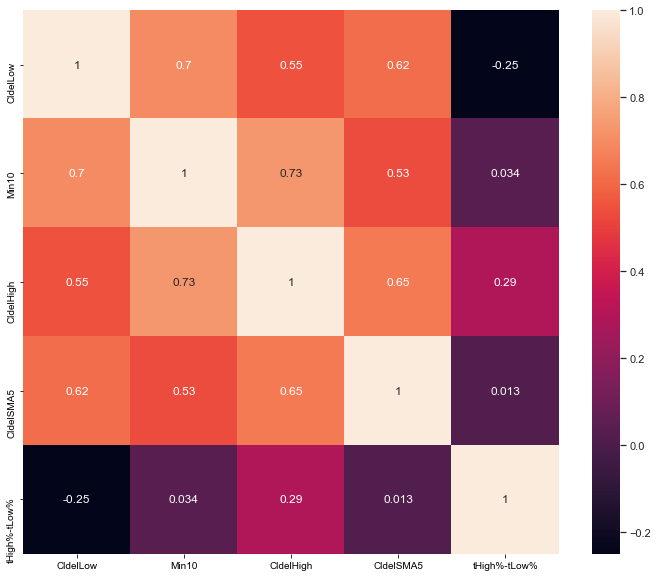

In [13]:
fig, ax  = plt.subplots(figsize = (12,10))
import seaborn as sns; sns.set()
ax = sns.heatmap(cor.corr(), annot=True)

In [11]:
pd.pivot_table(data_f[
    (data_f['KSTClose_10_10_15_10_20_10_30_15']>-503.8)
   &(data_f['KSTClose_10_10_15_10_20_10_30_15']<-76)
],
               index='Year',
               values='res_profit',
               aggfunc=['mean', 'count'],
               margins=True
              )

KeyError: 'res_profit'

In [324]:
writer = pd.ExcelWriter('result_11page_.xlsx', engine='openpyxl', mode="a")
result_(0.55,0.5).to_excel(writer, sheet_name = '0.55 все цикл(кол и срд)', startcol = 1)
writer.save()
writer.close()